In [40]:
d = 2**8
print("d=(%d)"%(d,))

d=(256)


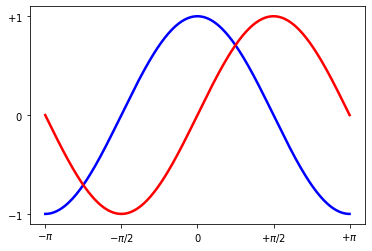

In [41]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
[r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min()*1.1,C.max()*1.1)
plt.yticks([-1, 0, +1],
[r'$-1$', r'$0$', r'$+1$'])

plt.show()

In [42]:
a=1+1

# 11

(0.9782416184887599, 1.1430681092271564e-20)
9449.962321455077
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           1.14e-20
Time:                        11:46:13   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

/Users/denghui/.local/share/virtualenvs/sde-cfm_NoCz/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/denghui/.local/share/virtualenvs/sde-cfm_NoCz/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/denghui/.local/share/virtualenvs/sde-cfm_NoCz/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/denghui/.local/share/virtualenvs/sde-cfm_NoCz/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/denghui/.local/share/virtualenvs/sde-cfm_NoCz/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38469

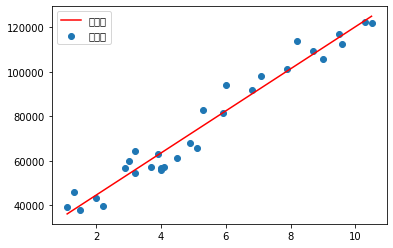

In [43]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

datas = pd.read_csv("../data/Salary_Data.csv")
y = datas.iloc[:, 1] # 因变量为第 2 列数据
x = datas.iloc[:, 0] # 自变量为第 3 列数据

from scipy.stats import pearsonr
pccs = pearsonr(x, y)
print(pccs)
y_std= np.std(y)
x_std= np.std(x)
print(pccs[0]*y_std/x_std)
x = sm.add_constant(x) # 若模型中有截距，必须有这一步
model = sm.OLS(y, x).fit() # 构建最小二乘模型并拟合
print(model.summary()) # 输出回归结果


# 画图
# 这两行代码在画图时添加中文必须用
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

predicts = model.predict() # 模型的预测值
x = datas.iloc[:, 0] # 自变量为第 3 列数据
plt.scatter(x, y, label='实际值') # 散点图
plt.plot(x, predicts, color = 'red', label='预测值')
plt.legend() # 显示图例，即每条线对应 label 中的内容
plt.show() # 显示图形

